In [1]:
# Dependecies and Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data file
df  = pd.read_csv('Online_retail/Online_Retail.csv', encoding = 'unicode_escape', parse_dates=['InvoiceDate']   )
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom


In [3]:
# Get info on data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# cropping non-essential columns and adding Total Sales(Quantity*UnitPrice)

features = ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']
df_clv = df[features]
df_clv['TotalSales'] = df_clv['Quantity'].multiply(df_clv['UnitPrice'])
print(df_clv.shape)
df_clv.head()


(541909, 6)


,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalSales
0,17850.0,536365,2010-01-12 08:26:00,6,2.55,15.30
1,17850.0,536365,2010-01-12 08:26:00,6,3.39,20.34
2,17850.0,536365,2010-01-12 08:26:00,8,2.75,22.00
3,17850.0,536365,2010-01-12 08:26:00,6,3.39,20.34
4,17850.0,536365,2010-01-12 08:26:00,6,3.39,20.34


In [5]:
df_clv.describe()

,CustomerID,Quantity,UnitPrice,TotalSales
count,406829.000000,541909.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114,17.987795
std,1713.600303,218.081158,96.759853,378.810824
min,12346.000000,-80995.000000,-11062.060000,-168469.600000
25%,13953.000000,1.000000,1.250000,3.400000
50%,15152.000000,3.000000,2.080000,9.750000
75%,16791.000000,10.000000,4.130000,17.400000
max,18287.000000,80995.000000,38970.000000,168469.600000


In [6]:
# Removing negative sales due to return
df_clv = df_clv[df_clv['TotalSales'] > 0]
df_clv.describe()

,CustomerID,Quantity,UnitPrice,TotalSales
count,397884.000000,530104.000000,530104.000000,530104.000000
mean,15294.423453,10.542037,3.907625,20.121871
std,1713.141560,155.524124,35.915681,270.356743
min,12346.000000,1.000000,0.001000,0.001000
25%,13969.000000,1.000000,1.250000,3.750000
50%,15159.000000,3.000000,2.080000,9.900000
75%,16795.000000,10.000000,4.130000,17.700000
max,18287.000000,80995.000000,13541.330000,168469.600000


In [7]:
#   Check for Null
df_clv.isnull().sum()

CustomerID     132220
InvoiceNo           0
InvoiceDate         0
Quantity            0
UnitPrice           0
TotalSales          0
dtype: int64

In [8]:
# Removing missing CustomerID rows  
df = df_clv[pd.notnull(df_clv['CustomerID'])]
df.isnull().sum()

CustomerID     0
InvoiceNo      0
InvoiceDate    0
Quantity       0
UnitPrice      0
TotalSales     0
dtype: int64

### BG/NBD Model
Beta Geometric/Negative Binomial Distribution with Gamma-Gamma extension.

The BG/NBD model has few assumptions:

     01.When a user is active, number of transactions in a time t is described by Poisson distribution with rate lambda.

     02.Heterogeneity in transaction across users (difference in purchasing behavior across users) has Gamma distribution with shape parameter r and scale parameter a.
     
     03.Users may become inactive after any transaction with probability p and their dropout point is distributed between purchases with Geometric distribution.

     04.Heterogeneity in dropout probability has Beta distribution with the two shape parameters alpha and beta.
     
     05.Transaction rate and dropout probability vary independently across users.

In [9]:
#https://lifetimes.readthedocs.io/en/latest/

import lifetimes

In [10]:
# Creating the summary data using summary_data_from_transaction_data function
summary = lifetimes.utils.summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', 'TotalSales' )
summary = summary.reset_index()
summary.head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,326.0,0.000000
1,12347.0,6.0,476.0,516.0,599.701667
2,12348.0,3.0,283.0,359.0,301.480000
3,12349.0,0.0,0.0,19.0,0.000000
4,12350.0,0.0,0.0,311.0,0.000000


frequency - the number of repeat purchases <br>
Recency -   the time between last transcation and end of transcation period<br>
monetary value - the mean of a given customers sales value

count    4338.000000
mean        2.864223
std         5.949000
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 35.68 %


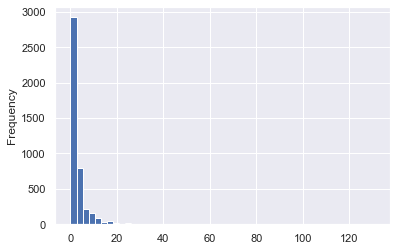

In [11]:
# Create a distribution of frequency to understand the customer frequence level
summary['frequency'].plot(kind='hist', bins=50)
print(summary['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(summary['frequency'] == 0)/float(len(summary))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [16]:
# beta-geometric BG/NBD model
def bgnbd_model(summary):
    """Instantiate and Fitting the BG/NBD model

       Args:
            Summary of RFM Transcation data

       Returns:
             bgnbd model fit to the data
    """
    # Penalizer coefficient - 
    bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.1)
    bgf.fit(summary['frequency'], summary['recency'], summary['T'])
    print(bgf.summary)
    return bgf

In [19]:
# Pareto/negative binomial distribution (NBD) 
def paretonbd_model(summary):
    """Instantiate and Fitting the Pareto/NBD model

       Args:
            Summary of RFM Transcation data

       Returns:
             paretobd model fit to the data
    """
    # Penalizer coefficient - 
    pnbdf = lifetimes.ParetoNBDFitter(penalizer_coef=0.1)
    pnbdf.fit(summary['frequency'], summary['recency'], summary['T'])
    print(pnbdf.summary)
    return pnbdf

In [17]:
# Model summary - Estimated distribution parameter values from the historical data
# Second column - standard error of co-efficient - a measurement of precision
bgf = bgnbd_model(summary)

               coef      se(coef)  lower 95% bound  upper 95% bound
r      6.362828e-01  1.579082e-02     6.053328e-01     6.672328e-01
alpha  6.543582e+01  2.128025e+00     6.126489e+01     6.960675e+01
a      3.529456e-18  3.361754e-12    -6.589035e-12     6.589042e-12
b      1.831731e-08  1.744681e-02    -3.419574e-02     3.419577e-02


<lifetimes.BetaGeoFitter: fitted with 4338 subjects, a: 0.00, alpha: 65.44, b: 0.00, r: 0.64>

In [18]:
# Compute the customer alive probability (customer churn rate)
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,CustomerID,frequency,recency,T,monetary_value,probability_alive
0,12346.0,0.0,0.0,326.0,0.000000,1.0
1,12347.0,6.0,476.0,516.0,599.701667,1.0
2,12348.0,3.0,283.0,359.0,301.480000,1.0
3,12349.0,0.0,0.0,19.0,0.000000,1.0
4,12350.0,0.0,0.0,311.0,0.000000,1.0
5,12352.0,6.0,268.0,341.0,253.565000,1.0
6,12353.0,0.0,0.0,205.0,0.000000,1.0
7,12354.0,0.0,0.0,233.0,0.000000,1.0
8,12355.0,0.0,0.0,96.0,0.000000,1.0
9,12356.0,2.0,303.0,326.0,269.905000,1.0


In [19]:
# Checking the relationship between frequency and monetary_value
return_customers_summary = summary[summary['frequency']>0]
print(return_customers_summary.shape)
return_customers_summary.head()

(2790, 6)


,CustomerID,frequency,recency,T,monetary_value,probability_alive
1,12347.0,6.0,476.0,516.0,599.701667,1.0
2,12348.0,3.0,283.0,359.0,301.480000,1.0
5,12352.0,6.0,268.0,341.0,253.565000,1.0
9,12356.0,2.0,303.0,326.0,269.905000,1.0
11,12358.0,1.0,117.0,120.0,484.860000,1.0


In [20]:
# Checking the relationship between frequency and monetary_value using Pearson correlation.
#  Assumption hold true. there is no relationship between frequency and monetary value of transactions.
return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.014915
monetary_value,0.014915,1.000000


In [22]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.402302,0.272364,10.868468,11.936137
q,0.844317,0.019846,0.805419,0.883215
v,11.513527,0.282535,10.959759,12.067295


In [ ]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.402302,0.272364,10.868468,11.936137
q,0.844317,0.019846,0.805419,0.883215
v,11.513527,0.282535,10.959759,12.067295


In [24]:
summary = summary[summary['monetary_value'] >0]

In [25]:
# Predicting Customer Lifetime Value for the next 30 days
summary['predicted_clv'] =      ggf.customer_lifetime_value(bgf,
                                                               summary['frequency'],
                                                               summary['recency'],
                                                               summary['T'],
                                                               summary['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate annually 12.7%
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,predicted_clv
1,12347.0,6.0,476.0,516.0,599.701667,1.0,204.425506
2,12348.0,3.0,283.0,359.0,301.480000,1.0,78.051053
5,12352.0,6.0,268.0,341.0,253.565000,1.0,124.189755
9,12356.0,2.0,303.0,326.0,269.905000,1.0,55.524270
11,12358.0,1.0,117.0,120.0,484.860000,1.0,131.899694
